### Maryam
#### Predicting the percentage of students based on study hours using linear regression

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
# reading the csv file
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
# show the first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#declaring the dependent and independent variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

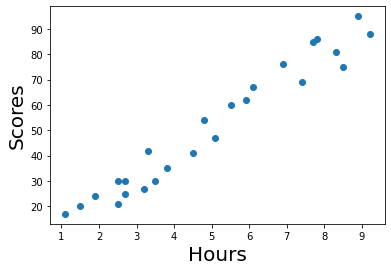

In [7]:
plt.scatter(X,y)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

### Building our model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [10]:
x_train.shape

(18, 1)

In [11]:
y_train.shape

(18,)

In [12]:
x_test.shape

(7, 1)

In [13]:
y_test.shape

(7,)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

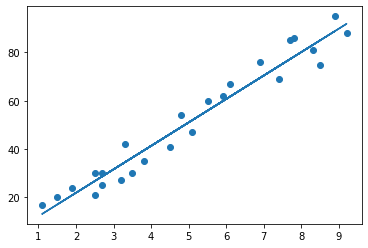

In [15]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
y_pred = lm.predict(x_test)
y_pred.tolist()

[83.10733229031521,
 26.765597573074857,
 26.765597573074857,
 69.5076032206365,
 59.79351102800886,
 28.708416011600388,
 34.536871327176975]

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511


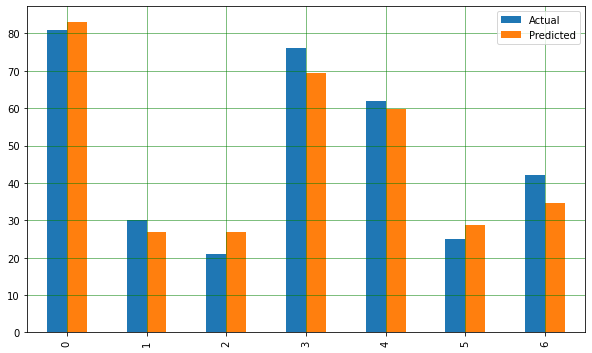

In [18]:
# a graph showing the predicted values against there actual values for LINEAR REGRESSION
df.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Testing with an input

In [19]:
hours =9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.33571987331146


### Evaluating the model

In [20]:
from sklearn import metrics
MSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Squared Error is', MSE)

Mean Squared Error is 4.849370684387327


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9553509219739938